# Likes Report

by Isabel Hayes - Using my Instagram data

In this report I will be analyzing how often i like differnt accounts on Instagram. I will try to figure out some of my habits on instrgram and what accounts I like the most.

### Required packages for analysis

In [11]:
from matplotlib import pyplot as plt
import json
from datetime import datetime as dt
import seaborn
import pandas as pd

### Reading in dataset

I downloaded this data set from Instagram account options

In [12]:
with open(r'C:\Users\ihay0\OneDrive\Desktop\isabelmh_20210208\likes.json') as l:
    likes = json.load(l)

Figure out the the type of data I am working with

In [13]:
type(likes)

dict

In [14]:
len(likes)

2

The code bellow shows the directories for the like report. 

In [15]:
likes.keys()

dict_keys(['media_likes', 'comment_likes'])

In [16]:
len(likes['media_likes'])

8693

In [17]:
len(likes['comment_likes'])

34

Making a DataFrame for all the post that I have liked

In [18]:
likes_df = pd.DataFrame(likes['media_likes'], columns= ['timestamp', 'account'])
likes_df

,timestamp,account
0,2021-02-04T03:08:03+00:00,allelitewrestling
1,2021-02-03T23:18:02+00:00,irohs_spilled_tea
2,2021-02-03T14:34:55+00:00,mathewplayswithfire
3,2021-02-03T14:27:54+00:00,memeswithkenobi
4,2021-02-03T14:26:46+00:00,starwarspg
...,...,...
8688,2013-10-06T23:13:05+00:00,brittany0310
8689,2013-10-06T22:41:23+00:00,dominic_didado
8690,2013-09-15T15:30:10+00:00,brittany0310
8691,2013-09-06T00:05:28+00:00,brittany0310


Grouping the data by the accounts and the number of times I have liked a post from that account.

In [19]:
group_df = likes_df.groupby('account').count().sort_values('timestamp', ascending = False)
group_df

,timestamp
account,
a_marmaduke14,125
clairestruh,123
wwe,99
ml10e,85
christinab101,78
...,...
bitchykind,1
m.rte,1
lyssanla,1


### Making a barchart out of the grouped data

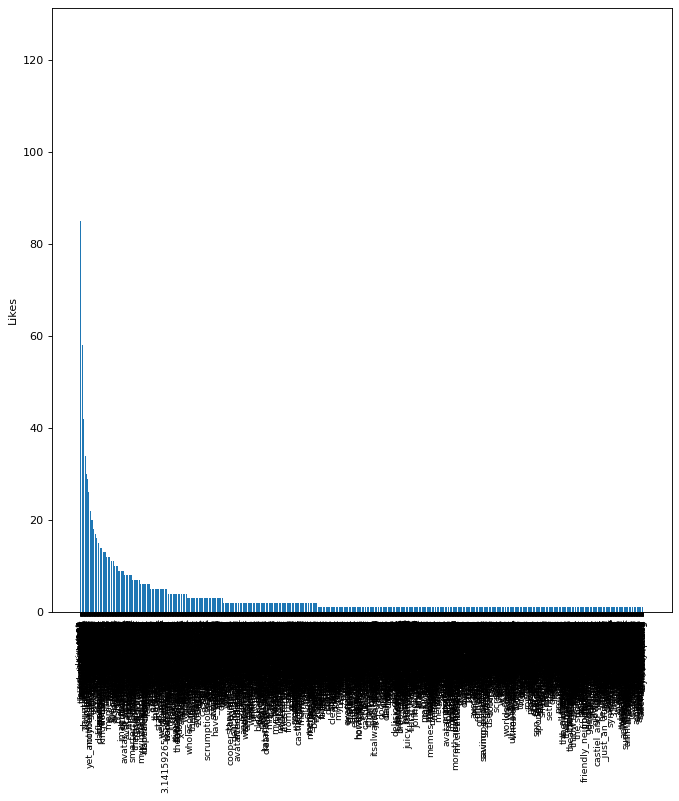

In [20]:
sortcount = group_df.sort_values('timestamp' ,ascending=False)
labels = sortcount['timestamp'].keys()
vals = sortcount['timestamp']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('Likes')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

##### Combinding all acounts that I have like less than 50 times together 

In [23]:
toplikes = group_df['timestamp'] > 50
countstop, countsbot = sortcount[toplikes], sortcount[-toplikes]
other = countsbot.sum()

piedat = countstop.append(pd.DataFrame(other['timestamp'], columns = ['timestamp'], index = ['other < 50']))
piedat.head()

<ipython-input-23-25476c20e6df>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  countstop, countsbot = sortcount[toplikes], sortcount[-toplikes]


,timestamp
a_marmaduke14,125
clairestruh,123
wwe,99
ml10e,85
christinab101,78


#### Making a pie chart out of the data above 

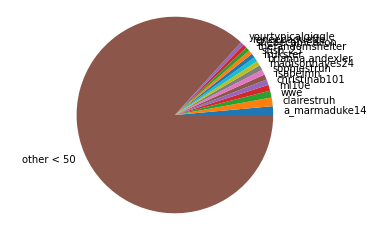

In [24]:
vals = piedat['timestamp']
labels = piedat['timestamp'].keys()


fig3, ax3 = plt.subplots()
ax3.pie(vals, labels = labels)
ax3.axis('equal')
plt.show()

#### In conclusion

As you can see I do not really have an account that I like the most. The top few that are the highest are a few of my friends from high school. A lot of the account I like I find on the exploring page so I often only like a few post from these accounts. 